<a href="https://colab.research.google.com/github/nikhi1010/Predict-Percentage-of-Student-based-on-no.-of-hours-study/blob/main/Percentage_of_Student_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 1 - Prediction using Supervised Machine Learning

## Importing the dataset

In [20]:

#Importing required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [21]:
#Reading the data from link
df = pd.read_csv("/content/student_scores - student_scores.csv")
df.head() #Observation of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
df.shape #no of rows and columns

(25, 2)

In [23]:
df.isnull().sum() #returns the number of missing values in the data set

Hours     0
Scores    0
dtype: int64

## Visualization

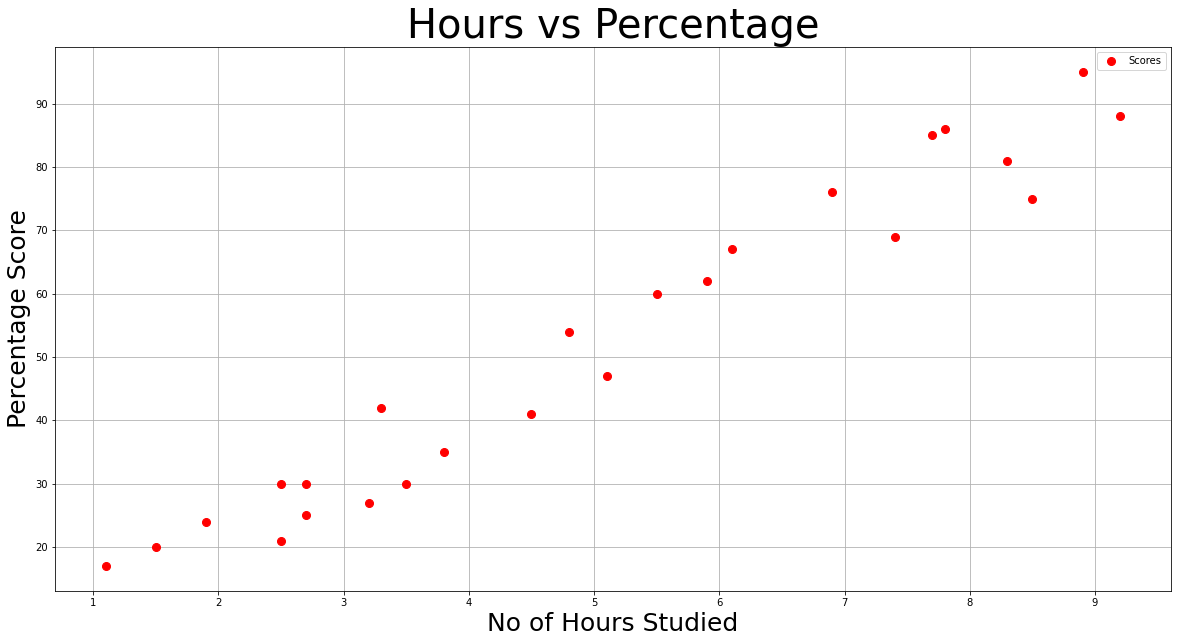

In [24]:
# Plotting the dataset

plt.rcParams["figure.figsize"] = [20,10]
df.plot(x='Hours', y='Scores', style='o', color='red', markersize=8)
plt.title('Hours vs Percentage',fontsize=40)  
plt.xlabel('No of Hours Studied',fontsize=25)  
plt.ylabel('Percentage Score',fontsize=25)  
plt.grid()
plt.show()

## Splitting the Data

In [25]:
x = df.iloc[:, :1].values #Hours values
y = df.iloc[:, 1:].values #Scores values

In [26]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Trainig the Model

In [27]:
from sklearn.linear_model import LinearRegression #importing LinearRegression model from library

model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

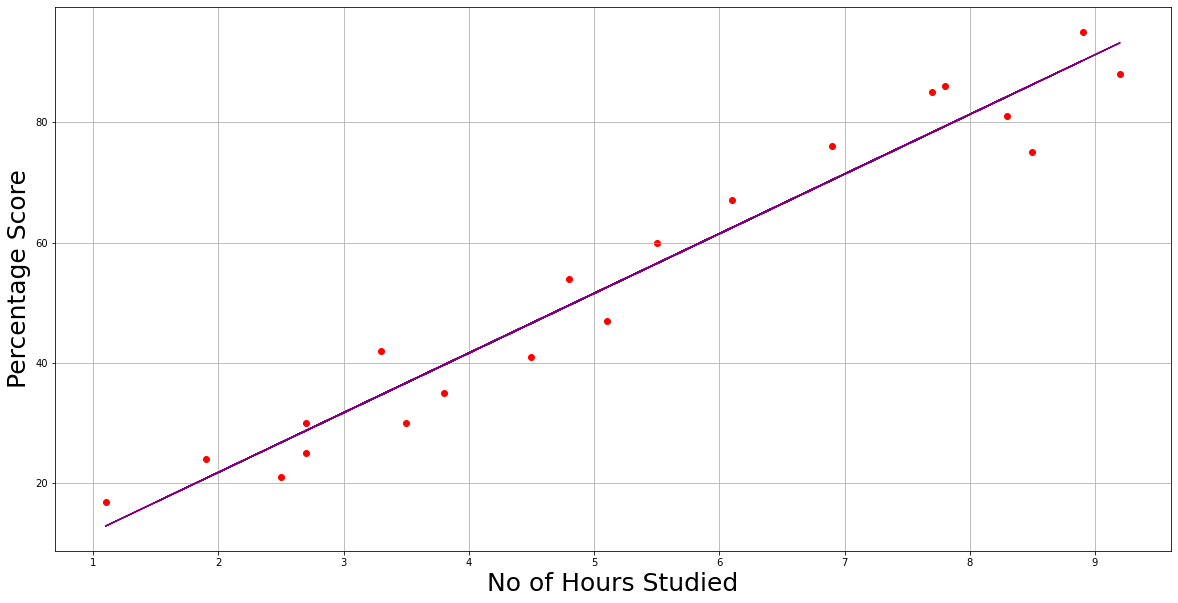

In [28]:
line = model.coef_*x + model.intercept_

plt.rcParams["figure.figsize"] = [20,10]
plt.scatter(x_train, y_train, color='red')
plt.plot(x, line, color='purple');  
plt.xlabel('No of Hours Studied',fontsize=25)  
plt.ylabel('Percentage Score',fontsize=25)  
plt.grid()
plt.show()

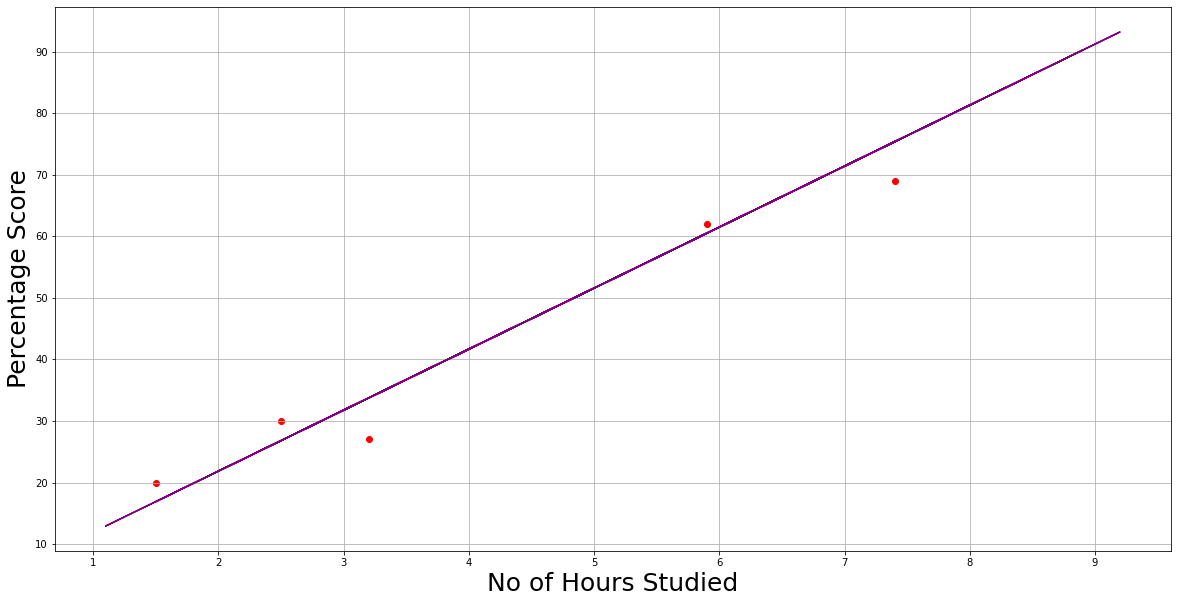

In [29]:
# Plotting for the testing data

plt.rcParams["figure.figsize"] = [20,10]
plt.scatter(x_test, y_test, color='red')
plt.plot(x, line, color='purple');
plt.xlabel('No of Hours Studied',fontsize=25)  
plt.ylabel('Percentage Score',fontsize=25)  
plt.grid()
plt.show()

## Making Prediction

In [36]:
print(x_test)                   #Testing data in Hours
y_pred = model.predict(x_test)  #scores Prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
#actual data
print(y_test) 

[[20]
 [27]
 [69]
 [30]
 [62]]


In [32]:
#predicted data
print(y_pred) 

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [33]:
comp = pd.DataFrame({ 'Actual':[y_test], 'Predicted':[y_pred] }) # Comparing Actual vs Predicted
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [34]:
hours = 9.25                        #Prediction for our own dataset say 9.25/day
opred = model.predict([[hours]])    #returns the output tensor
print("If a person studies for",hours,"hours, Predicted score is",opred[0])

If a person studies for 9.25 hours, Predicted score is [93.69173249]


## Evaluating a Model

In [35]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #absolute error regression loss

Mean Absolute Error: 4.183859899002982
